<font color='green'><h1><center>Case Study - Lead Scoring</center></h1></font>

### PROBLEM STATEMENT

<p style="font-family: Arial; font-size:1.0em;color:blue;">X Education, an education company, gets a lot of leads, but its lead conversion rate is very less (~30%). Our goal is to improve the lead conversion rate by identifying the most potential leads, also known as ‘Hot Leads’.
We have to build a model with 80% sensitivity, assign lead score to all the leads, which depicts the chances of a lead getting converted.

### IMPORTING LIBRARIES

In [1]:
# Supress the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let's import the required libraries.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

### READING THE DATASET

In [3]:
# Read the dataset.
path=os.getcwd()
data=pd.read_csv(path+r'/Leads.csv')

### GENERAL CHECKS ON DATA

In [4]:
# Check the head of the dataset.
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Check the shape of the dataset.
data.shape

(9240, 37)

In [6]:
# Info of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
# Check the summary statistics of the dataframe.
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### DATA CLEANING

In [8]:
# Get the columns of the dataframe.
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Data duplication is one of the major issues which is often faced. We have to make sure there are no duplicate data available in the dataset. Presense of duplicate data makes the dataset more redundant.

In [9]:
# Check for duplicates (w.r.t 'Prospect ID')
data.loc[data.duplicated(subset = 'Prospect ID')]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [10]:
# Check for duplicates (w.r.t 'Lead Number')
data.loc[data.duplicated(subset = 'Lead Number')]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


<p style="font-family: Arial; font-size:1.0em;color:blue;">  Observation:<br>
From the above calculations, we determined that there is no duplicate data present in the columns of Lead Number and Prospect ID. Then we dropped those 2 columns since they are not required for futher analysis.

In [11]:
# Drop 'Prospect ID' and 'Lead Number' columns.
id = data[['Prospect ID', 'Lead Number']].copy()
data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

# Look at the head of the 'id' dataframe
id.head()

,Prospect ID,Lead Number
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,3256f628-e534-4826-9d63-4a8b88782852,660681


In [12]:
# Look at the head of the dataframe.
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


<p style="font-family: Arial; font-size:1.0em;color:blue;">   We noticed that in a lot columns, there is an attribute called 'Select'.  So, we consider it as null value and then do the further analysis.

In [13]:
# Replace all 'Select' values in the dataframe with 'np.NaN'.
data = data.replace('Select', np.nan)

# Look at the head of the dataframe.
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### CALUCULATING THE NULL VALUES

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Null values in the dataframe will effect the analysis and will not be helpful in securing the accurate results. So, we first count the percentage of Null values in each column of the dataframe and deleting the desired based on futher analyis.

In [14]:
# Get the column-wise null values.
columns_missingper = (data.isnull().mean()*100).round(2)
columns_missingper

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

<p style="font-family: Arial; font-size:1.0em;color:blue;">  From the above data, we will consider the threshold value as 45 percent. i.e. all the columns which have more than 45 percent missing values will be dropped.

In [15]:
# Get the columns with more than 45% missing values.
columns_todrop = columns_missingper[columns_missingper.sort_values(ascending = False) > 45].index.tolist()
columns_todrop

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [16]:
# Drop the columns with more than 45% missing values.
data.drop(columns_todrop, axis = 1, inplace = True)

# Get the columns of the dataframe to confirm
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<p style="font-family: Arial; font-size:1.0em;color:blue;">  There is a case where the data in the columns will be unevenly distributed having one column more skewed than the other. We will find multiple cases for this condition.<br>1. We will find those columns where there is only unique value and we will drop it.<br>2. We will find the columns which have only 2 unique values and find out if the data is skewed towards any one of the value and drop if necessary.<br>3. We will group together the low frequency values of a column as 'Other'. 

In [17]:
# Get the categorical columns of the dataframe into a list.
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
# First identify the columns with only one unique value.
uniquevalues_1_cols = [col for col in cat_cols if len(data[col].unique()) == 1]
uniquevalues_1_cols

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

<p style="font-family: Arial; font-size:1.0em;color:blue;">  The above are the columns where there is only unique value present. So, considering the column for analysing doesn't add any value. So, we drop the those columns.

In [19]:
# Drop the categorical columns with only one unique value.
data.drop(uniquevalues_1_cols, axis=1, inplace=True)

# Get the columns of the dataframe to confirm.
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [20]:
# update the 'cat_cols' variable after dropping few to proceed further.
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [21]:
# Now, identify the columns with 2 unique values and check the value counts.
uniquevalues_2_cols = [col for col in cat_cols if len(data[col].unique()) == 2]
uniquevalues_2_cols

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

<p style="font-family: Arial; font-size:1.0em;color:blue;">  The above are the columns where there only 2 unique values and find out if the data is skewed towards any one of the value.

In [22]:
# Get the value counts percentage for the columns with 3 unique values to check for skewness.
for col in uniquevalues_2_cols:
    print(data[col].value_counts(normalize=True)*100)
    print("-----------------------------------------")

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
-----------------------------------------
No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64
-----------------------------------------
No     99.848485
Yes     0.151515
Name: Search, dtype: float64
-----------------------------------------
No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64
-----------------------------------------
No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64
-----------------------------------------
No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64
-----------------------------------------
No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64
-----------------------------------------
No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64
-----------------------------------------
No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float6

<p style="font-family: Arial; font-size:1.0em;color:blue;">  From the above results, 'Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
               'Newspaper', 'Digital Advertisement', 'Through Recommendations' columns are skewed towards one variable. So, considering this column for future analysis will make the model complex and also doesn't provide the accurate results for our quiries. So, we drop these columns.

In [23]:
# By looking at the above result, let's drop all the highly skewed columns (>90%)
skewed_cols = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
               'Newspaper', 'Digital Advertisement', 'Through Recommendations']

# Drop the columns.
data.drop(skewed_cols, axis=1, inplace=True)

# Get the columns of the dataframe to confirm.
data.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [24]:
# update the 'cat_cols' variable after dropping few to proceed further.
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [25]:
# Get the value counts percentage for the remaining columns to check for skewness.
for col in cat_cols:
    print(data[col].value_counts(normalize=True)*100)
    print("-----------------------------------------")

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
-----------------------------------------
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
WeLearn               0.010865
welearnblog_Home      0.010865
youtubechannel        0.010865
blog                  0.010865
NC_EDM                0.010865
Pay per Click Ads     0.010865
testone               0.010865
Name: Lead Source, dtype: float64
-----------------------------------------
Email Opened

<p style="font-family: Arial; font-size:1.0em;color:blue;"> From the above result, the columns 'Country', 'What matters most to you in choosing a course' and 'What is your current occupation' are highly skewed. So, we drop those columns as presense of that data for furthere analysis doesn't add any value and also doesn't provide accurate results.

In [26]:
# Let's drop these 2 column.
data.drop(['Country', 'What matters most to you in choosing a course', 'What is your current occupation'], axis=1, inplace=True)

# Get the columns of the dataframe to confirm.
data.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Tags is not an important column because it is generated after someone from the sales team gets in touch with the lead. It's a column that is manually filled up by the Sales team.<br>
Since we are doing the modelling to predict to whom to call, Tags column will not be useful.<br>
Hence we are dropping the tags column.<br>Similarly, Last Notable Activity is an intermediate column which is an update while the sales team representative is in touch with the lead. So, even this column will not be useful.

In [27]:
# Drop the 'Tags' and 'Last Notable Activity' columns.
data.drop(['Tags', 'Last Notable Activity'], axis=1, inplace=True)

# Get the columns of the dataframe to confirm.
data.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'City', 'A free copy of Mastering The Interview'],
      dtype='object')

In [28]:
# Look at the shape of the dataframe after dropping columns.
data.shape

(9240, 10)

In [29]:
# Again, calculate the column wise null value percentage.
(data.isnull().mean()*100).round(2)

Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
City                                      39.71
A free copy of Mastering The Interview     0.00
dtype: float64

<p style="font-family: Arial; font-size:1.0em;color:blue;">Now that we successfully dropped all the highly skewed columns, let's proceed with the missing value imputation if any.

### MISSING VALUE IMPUTATION

<p style="font-family: Arial; font-size:1.0em;color:blue;">Below is the percentage of Null columns in the numerical columns.

In [30]:
# let's first pick up the numerical columns.
num_columns=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Calculate the missing value percenage in the numerical columns.
(data[num_columns].isnull().mean()*100).round(2)

TotalVisits                    1.48
Total Time Spent on Website    0.00
Page Views Per Visit           1.48
dtype: float64

<p style="font-family: Arial; font-size:1.0em;color:blue;">As the perfcentage of missing values is very low. We can eiether replace it with mean of median of that perticular column. But, that depends upon the impact of Outliers in those Columns

In [31]:
# Let's look at the summary statistics.
data[num_columns].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95, 0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


<p style="font-family: Arial; font-size:1.0em;color:blue;">On looking at the summary statistics, we have observed that outliers are present in the data. So, it is better to impute with median instead of mean.

In [32]:
# Let's impute the missing values in the numerical columns with mean.
data['TotalVisits'] = data['TotalVisits'].fillna((data['TotalVisits'].median()))
data['Page Views Per Visit'] = data['Page Views Per Visit'].fillna((data['Page Views Per Visit'].median()))

# Again, calculate the missing value percetage in the numerical columns to confirm.
(data[num_columns].isnull().mean()*100).round(2)

TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
dtype: float64

### OUTLIER ANALYSIS AND TREATMENT

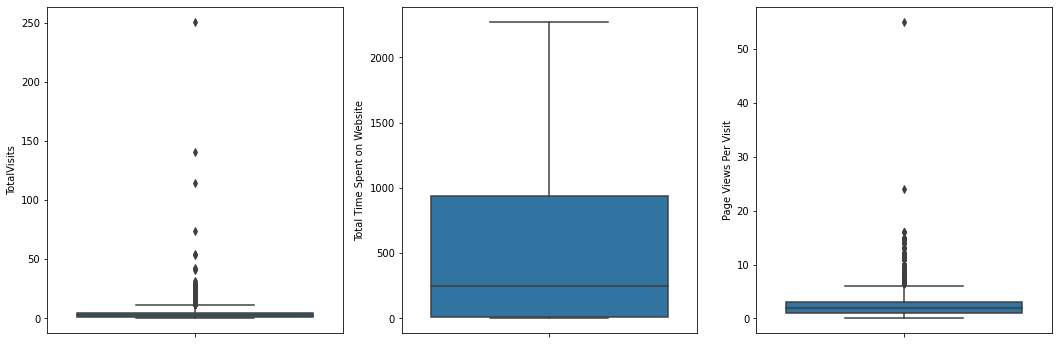

In [33]:
# Plot the individual boxplots for all the numerical attributes.
plt.figure(figsize=(18,6))
num_columns=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(num_columns): 
    ax = plt.subplot(1, 3, i[0]+1)
    sns.boxplot(y=i[1], data=data)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> There are good number of outliers in 'TotalVisits' and 'Page Views Per Visit' columns. So, we remove the ouliers in those columns.<br><p style="font-family: Arial; font-size:1.0em;color:blue;">It is clear from the above plots that there are outliers in the data. This will effect the data while analyzing and doesn't provide accurate results.<br>So, inorder to overcome the problem of outliers, we create the 2 quantiles q1 and q2 for 25th and 75th percentile and find the interquantile range iqr.<br>Then, we consider the dataframe with all the rows greater than l=(q1-1.5*iqr) and less than h=(q1+1.5*iqr)<br> All the values which has the values greater than l and h are considered as the outliers and are dropped out from the dataframe.</p>

In [34]:
# Create a function for removing the outliers.
def remove_outlier(df, cols):
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    
    # Interquartile range
    IQR = q3-q1
    
    l  = q1-1.5*IQR
    h = q3+1.5*IQR
    df = df[~((df[cols] < l) | (df[cols] > h)).any(axis=1)]
    return df

In [35]:
# Remove the outliers.
data = remove_outlier(data, ['TotalVisits', 'Page Views Per Visit'])

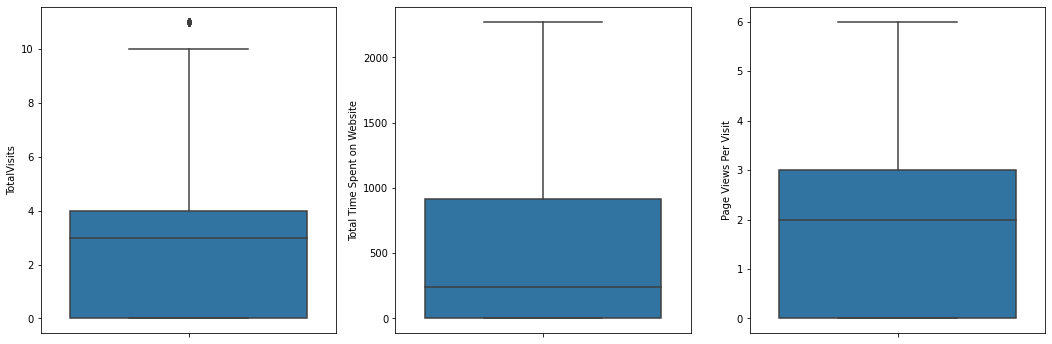

In [36]:
# Plot the individual boxplots for all the numerical attributes.
plt.figure(figsize=(18,6))
num_columns=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(num_columns): 
    ax = plt.subplot(1, 3, i[0]+1)
    sns.boxplot(y=i[1], data=data)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> The above boxplots show the distribution of the numerical columns after removing the outliers.

In [37]:
# Let's again look at the missing value percentages.
(data.isnull().mean()*100).round(2)

Lead Origin                                0.00
Lead Source                                0.41
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              1.19
Specialization                            38.01
City                                      41.28
A free copy of Mastering The Interview     0.00
dtype: float64

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Now, we have to replace the missing values in the categorical features. We can see that there are few features where the percentage of missing values is very less. For those features we replace the null values with mode of that perticaulr column. But, for the rows where the missing value percentage is more, we replace the null values with a special category called 'Not Specified'.

In [38]:
# Let's impute the less percentage of missing value column 'Lead Source' and 'Last Activity' with their mode.
data['Lead Source'].fillna('Google', inplace=True)
data['Last Activity'].fillna('Email Opened', inplace=True)

# Again look at the missing value percentages to confirm.
(data.isnull().mean()*100).round(2)

Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                            38.01
City                                      41.28
A free copy of Mastering The Interview     0.00
dtype: float64

In [39]:
# Finally, fill the missing values with 'Not Specified' -> let's drop them while creating dummy variables.
# This is done since imputing with mode will lead to skewness in the data.
data = data.replace(np.nan, 'Not Specified')

# Again look at the missing value percentages to confirm.
(data.isnull().mean()*100).round(2)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
dtype: float64

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Finally, all the missing values are filled with respective modifications!

In [40]:
# Let's check the percentage of rows retained after cleaning activity.
round(len(data)/9240*100, 2)

93.93

In [41]:
# Let's check if there is any data imbalance on the target variable.
data['Converted'].value_counts(normalize=True).round(4)*100

0    61.61
1    38.39
Name: Converted, dtype: float64

<p style="font-family: Arial; font-size:1.0em;color:blue;">  As we can see, the above information states that the conversion rate is around 62 percent  and the other is 38 percent. 

### EXPLORATORY DATA ANALYSIS

In [42]:
# Let's look at the head of the dataframe.
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Not Specified,No
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Not Specified,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Mumbai,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Mumbai,No


In [43]:
# Get the shape of the dataframe.
data.shape

(8679, 10)

Let's visualize the numeric variables

In [44]:
num_columns.insert(0, 'Converted')
num_columns

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

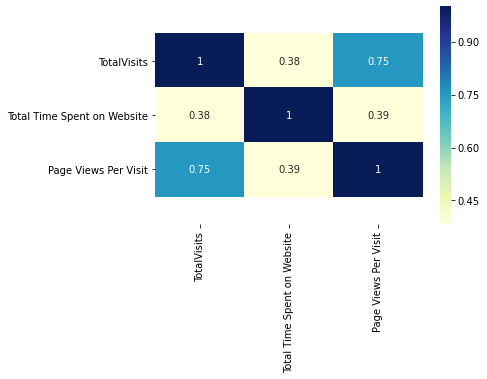

In [45]:
# Get the numeric columns.
num_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Heat map between the numeric attributes to look for correlation.
# plt.figure(figsize = (12, 8))
sns.heatmap(data[num_columns].corr(), annot = True, cmap="YlGnBu")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">  The above figure depicts the correlation matrix for the numerical columns.

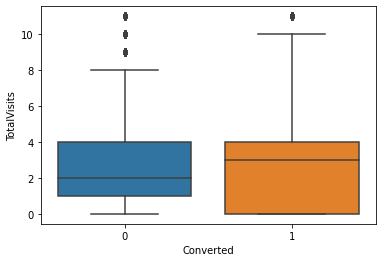

In [46]:
# Let's plot between target variable and 'TotalVisits'
sns.boxplot(x='Converted', y='TotalVisits', data=data)
plt.show()

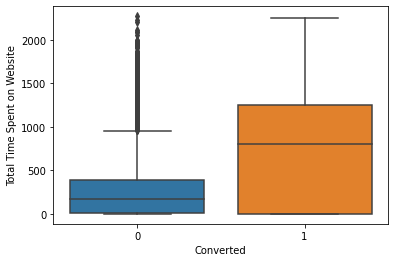

In [47]:
# Let's plot between target variable and 'Total Time Spent on Website'
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=data)
plt.show()

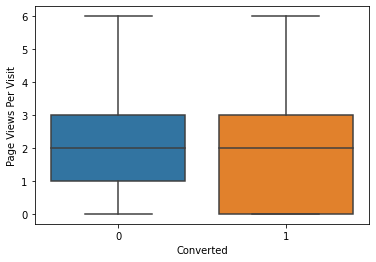

In [48]:
# Let's plot between target variable and 'Page Views Per Visit'
sns.boxplot(x='Converted', y='Page Views Per Visit', data=data)
plt.show()

Let's visualize the categorical variables

In [49]:
# Get the categorical columns.
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

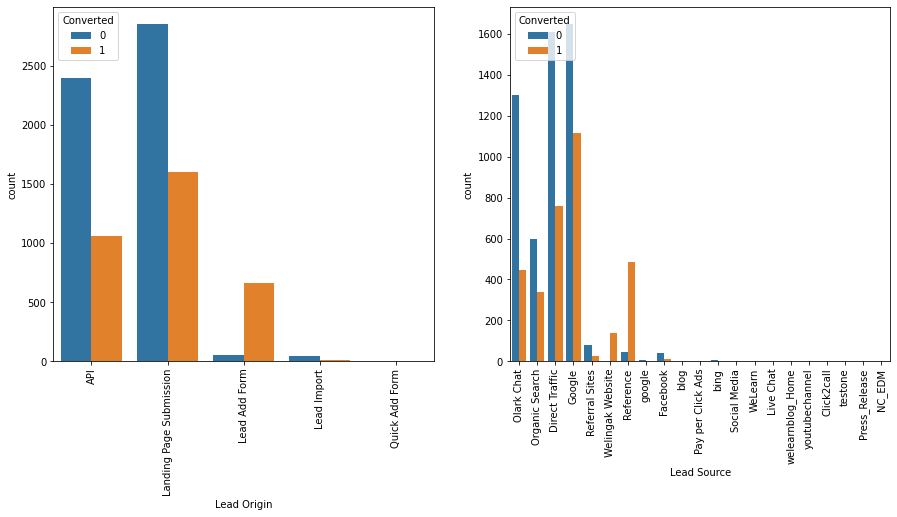

In [50]:
# Plot count plots for all the categorical columns.
# Let's pick 2 at a time for better legibility
plt.figure(figsize=(15,30))
for i in enumerate(cat_cols[:2]): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.countplot(x=i[1], hue = 'Converted', data=data)
    plt.xticks(rotation=90)
plt.show()

In [51]:
# Let's group together the low frequency values in 'Lead Source' column.
data['Lead Source'].value_counts()

Google               2768
Direct Traffic       2368
Olark Chat           1748
Organic Search        937
Reference             531
Welingak Website      141
Referral Sites        106
Facebook               54
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
Press_Release           1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
blog                    1
NC_EDM                  1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:blue;">  From the above plots, we determined that for few categorical features, the data is skewed. So, to decrease the number of dummy variables for these columns, we combine all the values which have very low occurences. This helps us in determining the precise results. 

In [52]:
# Get the low frequency columns.
lowfreq_cols = ['bing', 'Click2call', 'Social Media', 'Live Chat', 'testone', 'NC_EDM',
                'Press_Release', 'blog', 'welearnblog_Home', 'youtubechannel', 'WeLearn', 'Pay per Click Ads']

# Replace 'google' with 'Google'.
data['Lead Source'] = data['Lead Source'].replace('google', 'Google')

# Replace low frequency columns with 'Others'.
data['Lead Source'] = data['Lead Source'].replace(lowfreq_cols, 'Others')

# look at the value counts to confirm.
data['Lead Source'].value_counts()

Google              2773
Direct Traffic      2368
Olark Chat          1748
Organic Search       937
Reference            531
Welingak Website     141
Referral Sites       106
Facebook              54
Others                21
Name: Lead Source, dtype: int64

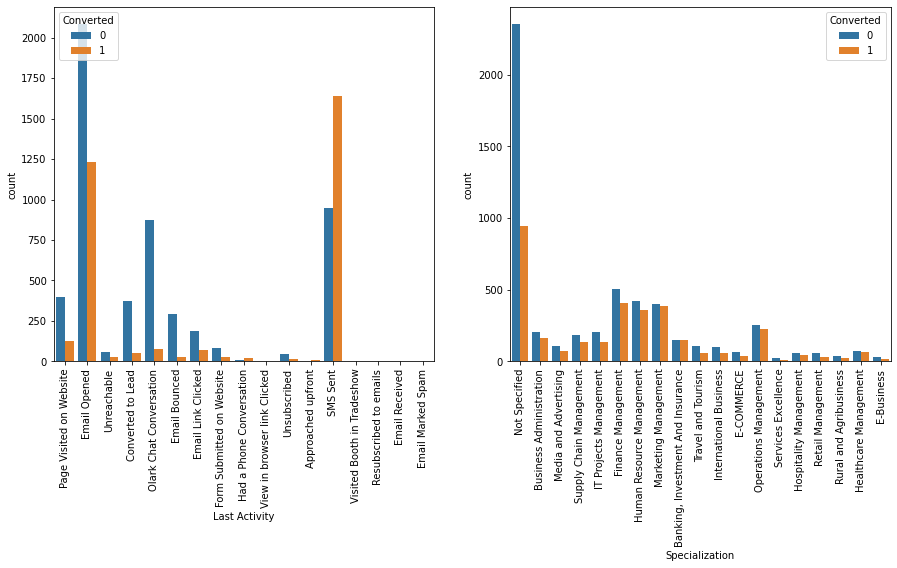

In [53]:
# Let's plot between the next 2 set of categorical variables.
plt.figure(figsize=(15,30))
for i in enumerate(cat_cols[2:4]): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.countplot(x=i[1], hue = 'Converted', data=data)
    plt.xticks(rotation=90)
plt.show()

In [54]:
# Let's group together the low frequency values in 'Last Activity' column.
data['Last Activity'].value_counts()

Email Opened                    3321
SMS Sent                        2587
Olark Chat Conversation          949
Page Visited on Website          525
Converted to Lead                425
Email Bounced                    316
Email Link Clicked               255
Form Submitted on Website        110
Unreachable                       87
Unsubscribed                      59
Had a Phone Conversation          26
Approached upfront                 9
View in browser link Clicked       4
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [55]:
# Get the low frequency columns.
lowfreq_cols = ['Approached upfront', 'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails']

# Replace low frequency columns with 'Others'.
data['Last Activity'] = data['Last Activity'].replace(lowfreq_cols, 'Others')

# look at the value counts to confirm.
data['Last Activity'].value_counts()

Email Opened                 3321
SMS Sent                     2587
Olark Chat Conversation       949
Page Visited on Website       525
Converted to Lead             425
Email Bounced                 316
Email Link Clicked            255
Form Submitted on Website     110
Unreachable                    87
Unsubscribed                   59
Had a Phone Conversation       26
Others                         19
Name: Last Activity, dtype: int64

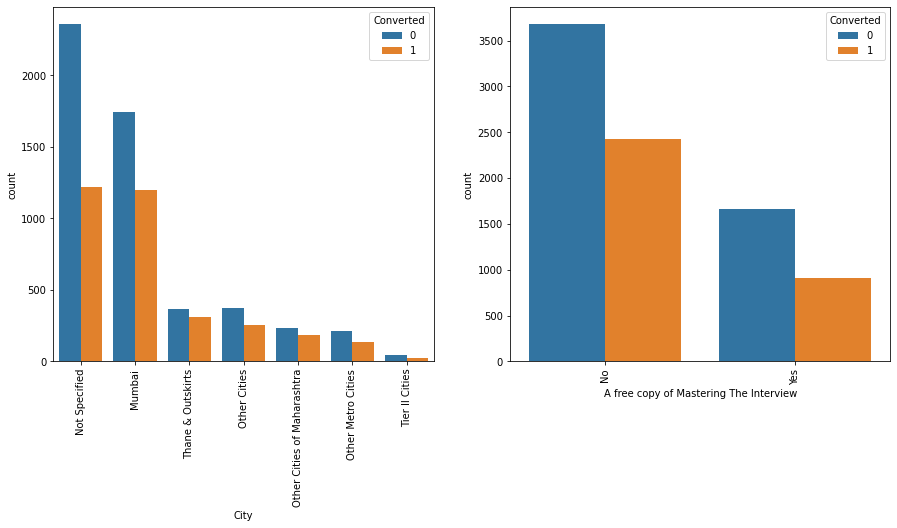

In [56]:
# Let's plot between the next 2 set of categorical variables.
plt.figure(figsize=(15,30))
for i in enumerate(cat_cols[4:6]): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.countplot(x=i[1], hue = 'Converted', data=data)
    plt.xticks(rotation=90)
plt.show()

### DATA PREPARATION

In [57]:
# Let's look at the head of the dataframe.
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Not Specified,No
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Not Specified,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Mumbai,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Mumbai,No


<p style="font-family: Arial; font-size:1.0em;color:blue;"> Let's create dummy variables for all the categorical variables

In [58]:
# Convert 'Yes' to 1 and 'No' to 0 in 'A free copy of Mastering The Interview' column.
data['A free copy of Mastering The Interview'] = data[['A free copy of Mastering The Interview']].apply(lambda x: x.map({'Yes': 1, "No": 0}))

# Look at the column to confirm
data['A free copy of Mastering The Interview'].head()

0    0
1    0
2    1
3    0
4    0
Name: A free copy of Mastering The Interview, dtype: int64

In [59]:
# Get the remaining categorical columns.
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'City'],
      dtype='object')

In [60]:
# Create a dummies dataframe for all the categorical columns.
dummies_df = pd.get_dummies(data[cat_cols])
dummies_df.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
# Get the columns of the dummies dataframe.
dummies_df.columns

Index(['Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Special

In [62]:
# Let's drop one column each for a categorical attribute. Let's drop 'Not Specified'/'Others' if exists.
drop_cols = ['Lead Origin_Quick Add Form', 'Lead Source_Others', 'Last Activity_Others', 
           'Specialization_Not Specified', 'City_Not Specified']

# Drop the columns.
dummies_df.drop(drop_cols, axis=1, inplace=True)

# Get the columns of the dataframe to confirm.
dummies_df.columns

Index(['Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Fin

In [63]:
# Let's now concat the dummies dataframe with the master dataframe.
data = pd.concat([data, dummies_df], axis = 1)

# Look at the head of the dataframe.
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Not Specified,0,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Not Specified,0,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,1,...,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Mumbai,0,...,0,0,0,0,1,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Mumbai,0,...,0,0,0,0,1,0,0,0,0,0


In [64]:
# Finally, let's drop the original categorical variables.
data.drop(cat_cols, axis=1, inplace=True)

# Look at the head of the dataframe to confirm.
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [65]:
# Final check to confirm that there are no categorical elements.
data.select_dtypes(include=['object']).columns

Index([], dtype='object')

#### Test-Train split

In [66]:
# Put the feature variables to X.
X = data.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,305,1.0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [67]:
# Put the response variable to y.
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [68]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### SCALING OF DATA

<p style="font-family: Arial; font-size:1.0em;color:blue;">Scaling is an important step in the data pre-processing of the model. It helps us in analysing the data more easily. Since, the range of features vary widely, scaling is used to limit or set the values in a certain range. This helps us in analysing the data better because all the features has the values in certain range. <br>

In [69]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()

<p style="font-family: Arial; font-size:1.0em;color:blue;">Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

In [70]:
# 'Fit' and transform the train set
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])

# Look at the head of the dataframe.
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
5182,-0.744673,-0.770602,-0.650023,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8469,-0.332511,-0.532344,-0.045307,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8382,0.079651,1.685292,-0.347665,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8031,0.079651,-0.081485,0.559408,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
6712,0.079651,2.942563,-0.045307,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# Look at the summary statistics of X_train.
X_train[num_columns].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.075000e+03,6.075000e+03,6.075000e+03
mean,-4.728728e-17,2.869218e-17,-1.534118e-16
std,1.000082e+00,1.000082e+00,1.000082e+00
min,-1.156834e+00,-8.714036e-01,-1.254739e+00
25%,-1.156834e+00,-8.714036e-01,-1.254739e+00
50%,7.965066e-02,-4.425385e-01,-4.530739e-02
75%,4.918123e-01,8.019033e-01,5.594084e-01
max,3.376944e+00,3.257797e+00,2.373556e+00


<p style="font-family: Arial; font-size:1.0em;color:blue;">Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables.<br>All the numerical columns have a mean = 0 and standard deviation = 1.
This implies scaling is done correctly.

In [72]:
# Check the conversion rate
conversion_rate = round((sum(data['Converted'])/len(data['Converted'].index))*100,2)
conversion_rate

38.39

<p style="font-family: Arial; font-size:1.0em;color:blue;">We have almost 38.39% conversion rate.

### MODEL BUILDING

#### MODEL - 1

In [73]:
# Let's create our first model using all the features.
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6023
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.0
Date:                Mon, 20 Apr 2020   Deviance:                       5189.9
Time:                        19:07:39   Pearson chi2:                 6.34e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               17.8776   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
TotalVisits                                          0.2171      0.053      4.062      0.000       0.112       0.322
Total Time Spent on Website                          1.0670      0.041     26.317      0.000       0.988       1.147
Page Views Per Visit                                -0.2767      0.061     -4.560      0.000      -0.396      -0.158
A free copy of Mastering The Interview              -0.2512      0.112     -2.239      0.025      -0.471      -0.031
Lead Origin_API                                    -18.4100   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission                -19.7157   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form                          -15.6592   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Import                            -18.2624   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Direct Traffic                           0.1655      0.809      0.205      0.838      -1.420       1.751
Lead Source_Facebook                                -0.5414      2.496     -0.217      0.828      -5.434       4.351
Lead Source_Google                                   0.3449      0.804      0.429      0.668      -1.231       1.920
Lead Source_Olark Chat                               1.3137      0.813      1.617      0.106      -0.279       2.906
Lead Source_Organic Search                           0.4781      0.813      0.588      0.556      -1.114       2.071
Lead Source_Reference                                0.8105      0.889      0.912      0.362      -0.932       2.553
Lead Source_Referral Sites                           0.1280      0.872      0.147      0.883      -1.582       1.838
Lead Source_Welingak Website                         3.7638      1.329      2.832      0.005       1.159       6.368
Last Activity_Converted to Lead                     -2.2594      0.702     -3.220      0.001      -3.635      -0.884
Last Activity_Email Bounced                         -3.0464      0.735     -4.142      0.000      -4.488      -1.605
Last Activity_Email Link Clicked                    -1.7508      0.701     -2.498      0.012      -3.125      -0.377
Last Activity_Email Opened                          -1.3112      0.674     -1.947      0.052      -2.631       0.009
Last Activity_Form Submitted on Website             -2.3810      0.751     -3.170      0.002      -3.853      -0.909
Last Activity_Had a Phone Conversation               0.0022      0.902      0.002      0.998      -1.765       1.769
Last Activity_Olark Chat Conversation    

<p style="font-family: Arial; font-size:1.0em;color:blue;"><br>
As we can see, there are many variables whose p-values are high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

<p style="font-family: Arial; font-size:1.0em;color:blue;">We'll first eliminate a features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### FEATURE SELECTION USING RFE

<p style="font-family: Arial; font-size:1.0em;color:blue;">Fitting the Logistic regression model with x-train and y-train datasets using Recursive Feature Elimination. RFE is the process of recursively removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable.

In [74]:
# Create a logistic regression object.
logreg = LogisticRegression()

# Run RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [75]:
rfe.support_

array([False,  True, False, False, False,  True,  True, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True])

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_API', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Direct Traffic', False, 29),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Reference', False, 25),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 3),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', False, 37),
 ('Last Activity_Form Submitted on Website', False, 4),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 

In [77]:
# RFE selected columns/features
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'City_Mumbai', 'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities'],
      dtype='object')

#### Model-2

In [78]:
# let's create our second model using the RFE selected features.
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6059
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.2
Date:                Mon, 20 Apr 2020   Deviance:                       5382.3
Time:                        19:07:40   Pearson chi2:                 6.33e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.5419      0.087    -17.660      0.000      -1.713      -1.371
Total Time Spent on Website                1.0876      0.040     27.522      0.000       1.010       1.165
Lead Origin_Landing Page Submission       -1.1316      0.132     -8.579      0.000      -1.390      -0.873
Lead Origin_Lead Add Form                  3.6811      0.204     18.037      0.000       3.281       4.081
Lead Source_Olark Chat                     1.1604      0.120      9.675      0.000       0.925       1.395
Lead Source_Welingak Website               2.5409      1.025      2.478      0.013       0.531       4.550
Last Activity_Email Bounced               -1.6483      0.301     -5.467      0.000      -2.239      -1.057
Last Activity_Had a Phone Conversation     1.5496      0.587      2.642      0.008       0.400       2.699
Last Activity_Olark Chat Conversation     -1.5882      0.174     -9.139      0.000      -1.929      -1.248
Last Activity_SMS Sent                     1.4074      0.073     19.168      0.000       1.263       1.551
City_Mumbai                                1.2402      0.134      9.262      0.000       0.978       1.503
City_Other Cities                          1.1901      0.166      7.176      0.000       0.865       1.515
City_Other Cities of Maharashtra           1.3397      0.191      7.011      0.000       0.965       1.714
City_Other Metro Cities                    1.2602      0.208      6.047      0.000       0.852       1.669
City_Thane & Outskirts                     1.3197      0.166      7.942      0.000       0.994       1.645
City_Tier II Cities                        1.2247      0.398      3.076      0.002       0.444       2.005
==========================================================================================================
"""

### VIF:
<p style="font-family: Arial; font-size:1.0em;color:blue;"> This refers to associations between predictor variables i.e. it refers to predictors that are correlated with other predictors. This is calculated using Variance Inflation Factor (VIF)<br> 
VIF=1/ 1−R2<br>
If the VIF is less than or equal to 1, then not correlated.<br>
If the VIF is between 1 and 5, then moderately correlated.<br>
If the VIF is greater than 5, then highly correlated.<br>

In [79]:
def check_vif(X):
    
    # Create a vif dataframe.
    vif = pd.DataFrame()
    
    # Add the features column.
    vif['Features'] = X.columns
    
    # Calculate the VIF.
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Round off VIF value to 2 digits.
    vif['VIF'] = round(vif['VIF'], 2)
    
    # Sort the VIF values in descending order.
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Print the VIF summary
    print(vif)

In [80]:
# Check the VIFs for the model.
check_vif(X_train[rfe_col])

                                  Features   VIF
1      Lead Origin_Landing Page Submission  7.02
9                              City_Mumbai  4.50
10                       City_Other Cities  1.73
13                  City_Thane & Outskirts  1.71
3                   Lead Source_Olark Chat  1.67
2                Lead Origin_Lead Add Form  1.53
11        City_Other Cities of Maharashtra  1.48
12                 City_Other Metro Cities  1.45
8                   Last Activity_SMS Sent  1.43
7    Last Activity_Olark Chat Conversation  1.42
4             Lead Source_Welingak Website  1.28
0              Total Time Spent on Website  1.26
14                     City_Tier II Cities  1.10
5              Last Activity_Email Bounced  1.06
6   Last Activity_Had a Phone Conversation  1.01


<p style="font-family: Arial; font-size:1.0em;color:blue;"> vif-value is high for 'Lead Origin_Landing Page Submission' column.
Let's drop this and build our model again.

#### Model-3

In [81]:
# Drop 'Lead Origin_Landing Page Submission' column as interpreted.
rfe_col = rfe_col.drop('Lead Origin_Landing Page Submission', 1)
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'City_Mumbai', 'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities'],
      dtype='object')

In [82]:
# let's create our third model.
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6060
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2728.9
Date:                Mon, 20 Apr 2020   Deviance:                       5457.9
Time:                        19:07:40   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.7278      0.086    -20.046      0.000      -1.897      -1.559
Total Time Spent on Website                1.0939      0.039     27.856      0.000       1.017       1.171
Lead Origin_Lead Add Form                  4.1457      0.196     21.167      0.000       3.762       4.530
Lead Source_Olark Chat                     1.4730      0.115     12.806      0.000       1.248       1.698
Lead Source_Welingak Website               2.3503      1.024      2.295      0.022       0.343       4.358
Last Activity_Email Bounced               -1.7556      0.299     -5.877      0.000      -2.341      -1.170
Last Activity_Had a Phone Conversation     1.5318      0.580      2.641      0.008       0.395       2.669
Last Activity_Olark Chat Conversation     -1.5983      0.173     -9.264      0.000      -1.936      -1.260
Last Activity_SMS Sent                     1.3533      0.073     18.651      0.000       1.211       1.496
City_Mumbai                                0.4286      0.092      4.635      0.000       0.247       0.610
City_Other Cities                          0.4190      0.137      3.065      0.002       0.151       0.687
City_Other Cities of Maharashtra           0.5476      0.166      3.291      0.001       0.221       0.874
City_Other Metro Cities                    0.4018      0.179      2.240      0.025       0.050       0.753
City_Thane & Outskirts                     0.5471      0.136      4.009      0.000       0.280       0.815
City_Tier II Cities                        0.3194      0.382      0.836      0.403      -0.430       1.068
==========================================================================================================
"""

In [83]:
# Check the VIFs for the model.
check_vif(X_train[rfe_col])

                                  Features   VIF
2                   Lead Source_Olark Chat  1.61
6    Last Activity_Olark Chat Conversation  1.41
1                Lead Origin_Lead Add Form  1.38
7                   Last Activity_SMS Sent  1.38
3             Lead Source_Welingak Website  1.27
0              Total Time Spent on Website  1.26
8                              City_Mumbai  1.20
4              Last Activity_Email Bounced  1.05
12                  City_Thane & Outskirts  1.05
9                        City_Other Cities  1.04
10        City_Other Cities of Maharashtra  1.03
11                 City_Other Metro Cities  1.03
5   Last Activity_Had a Phone Conversation  1.01
13                     City_Tier II Cities  1.01


<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
p-value is 0.403 for 'City_Tier II Cities' column which is high when compared to that of others.
Let's drop this and build our model again.

#### Model-4

In [84]:
# Drop 'City_Tier II Cities' column as interpreted.
rfe_col = rfe_col.drop('City_Tier II Cities', 1)
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'City_Mumbai', 'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts'],
      dtype='object')

In [85]:
# let's create our fourth model.
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6061
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.3
Date:                Mon, 20 Apr 2020   Deviance:                       5458.6
Time:                        19:07:40   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.7157      0.085    -20.223      0.000      -1.882      -1.549
Total Time Spent on Website                1.0938      0.039     27.859      0.000       1.017       1.171
Lead Origin_Lead Add Form                  4.1391      0.196     21.157      0.000       3.756       4.523
Lead Source_Olark Chat                     1.4625      0.114     12.803      0.000       1.239       1.686
Lead Source_Welingak Website               2.3458      1.024      2.290      0.022       0.338       4.353
Last Activity_Email Bounced               -1.7505      0.299     -5.858      0.000      -2.336      -1.165
Last Activity_Had a Phone Conversation     1.5276      0.580      2.634      0.008       0.391       2.664
Last Activity_Olark Chat Conversation     -1.6008      0.172     -9.283      0.000      -1.939      -1.263
Last Activity_SMS Sent                     1.3545      0.073     18.671      0.000       1.212       1.497
City_Mumbai                                0.4166      0.091      4.565      0.000       0.238       0.595
City_Other Cities                          0.4075      0.136      2.997      0.003       0.141       0.674
City_Other Cities of Maharashtra           0.5353      0.166      3.231      0.001       0.211       0.860
City_Other Metro Cities                    0.3893      0.179      2.178      0.029       0.039       0.740
City_Thane & Outskirts                     0.5352      0.136      3.945      0.000       0.269       0.801
==========================================================================================================
"""

In [86]:
# Check the VIFs for the model.
check_vif(X_train[rfe_col])

                                  Features   VIF
2                   Lead Source_Olark Chat  1.61
6    Last Activity_Olark Chat Conversation  1.41
1                Lead Origin_Lead Add Form  1.38
7                   Last Activity_SMS Sent  1.37
3             Lead Source_Welingak Website  1.27
0              Total Time Spent on Website  1.26
8                              City_Mumbai  1.20
12                  City_Thane & Outskirts  1.05
4              Last Activity_Email Bounced  1.04
9                        City_Other Cities  1.04
10        City_Other Cities of Maharashtra  1.03
11                 City_Other Metro Cities  1.03
5   Last Activity_Had a Phone Conversation  1.01


<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
All variables have a good value of VIF and low p-values(~0). So we need not drop any more variables and we can proceed with making predictions using this model only

In [87]:
# Let's predict the probabilities on the train data.
y_train_pred = res4.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.07184691, 0.02893484, 0.53187588, 0.19823953, 0.99646674,
       0.56732514, 0.1279563 , 0.23033031, 0.08223851, 0.0816353 ])

In [88]:
# Creating a dataframe with actual converted flag and predicted probabilities.
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.071847
1,0,0.028935
2,0,0.531876
3,0,0.198240
4,1,0.996467


In [89]:
# Plot the ROC curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate=False)

### ROC CURVE:
<p style="font-family: Arial; font-size:1.0em;color:blue;">  ROC (Receiver Operating Characteristic) curve plots the graph between the True positive rate and the False Postive rate. This graph determines if the model is good enough for logistic regression or not. If the area of the graph is greater than 0.5 i.e. if the line in the plot is on the upper left of the plot, then we can say that the data is good to perform the logistic regression.

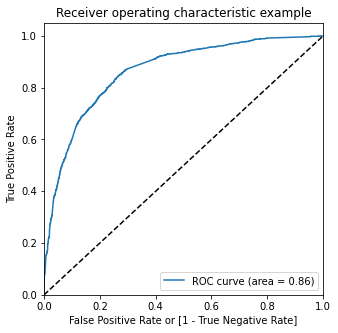

In [91]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Ideal ROC Curve would have a value close to 1. We got a good value of 0.86 indicating a good predictive model.

### FINDING THE OPTIMAL CUT OFF VALUE

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Optimal cutoff probability is probability at which sensitivity and specificity values are balanced.

In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(0,100,5)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.071847,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.028935,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.531876,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0.198240,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.996467,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [93]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float(x)/100 for x in range(0,100,5)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensitivity  specificity
0.00  0.00  0.381728     1.000000     0.000000
0.05  0.05  0.427984     0.995688     0.077476
0.10  0.10  0.550947     0.976714     0.288072
0.15  0.15  0.659095     0.941354     0.484824
0.20  0.20  0.710947     0.923243     0.579872
0.25  0.25  0.769218     0.865028     0.710064
0.30  0.30  0.777613     0.840448     0.738818
0.35  0.35  0.783045     0.786115     0.781150
0.40  0.40  0.788807     0.749461     0.813099
0.45  0.45  0.793745     0.707633     0.846912
0.50  0.50  0.796708     0.674860     0.871938
0.55  0.55  0.783374     0.586891     0.904686
0.60  0.60  0.777284     0.547219     0.919329
0.65  0.65  0.770041     0.502803     0.935037
0.70  0.70  0.759671     0.459681     0.944888
0.75  0.75  0.746831     0.409228     0.955272
0.80  0.80  0.732510     0.351013     0.968051
0.85  0.85  0.709794     0.277275     0.976837
0.90  0.90  0.681317     0.185425     0.987487
0.95  0.95  0.649877     0.088400     0.996539


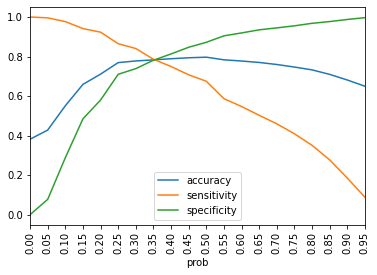

In [94]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.xticks([float(x)/100 for x in range(0,100,5)], rotation=90)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> From the above graph, we can say that at 0.35, the values of accuracy, sensitivty and specificity match. But, as per our business problem, we need to provide a model with sensitivity greater than 80 percent. Moreover, we cant lose the customers who are willing to join. So, our major prioirity is that we have to predict precisely about the customers who want to join the program. That means, the sensitivity of then algorithm should be high.<br><br> So, we will consider our cur off as 0.3. i.e. for all the customers, if their probability of conversion is more than 0.3,then they are predicted to be converted (1). If their probability of conversion is less than 0.3,then they are predicted to be not converted (0).

In [95]:
# Predict the train data using the optimal cut-off.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

# Look at the head of the dataframe.
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,0,0.071847,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.028935,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.531876,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0.198240,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.996467,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [96]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7776131687242799

In [97]:
# Let's get the confusion matrix.
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion_train

array([[2775,  981],
       [ 370, 1949]], dtype=int64)

In [98]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8404484691677447

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.7388178913738019

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Observations:<br>
As we can see above the model seems to be performing well. 
The ROC curve has a value of 0.86, which is very good and we have the following values for the train Data:
<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
Accuracy : 77.76%<br>
Sensitivity : 84.04%<br>
Specificity : 73.88%

In [101]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/float(TN+FP))

0.26118210862619806


In [102]:
# Positive predictive value 
print (TP/float(TP+FP))

0.6651877133105802


In [103]:
# Negative predictive value
print (TN/float(TN+FN))

0.8823529411764706


### PRECISION AND RECALL TRADE OFF

In [104]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

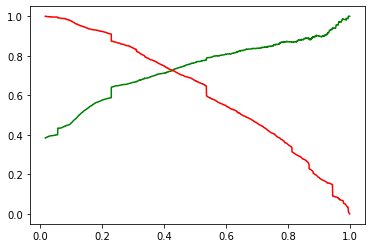

In [105]:
# Plot the curves.
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> From the above graph, the values of precision and recall match at 0.4, but as per our business problem ,we will go ahead with the cut off value that is acheived from our Sensitivity and Specificity graph.

### MAKING PREDICTIONS ON TEST DATA

In [106]:
# Transform the train set
X_test[num_columns] = scaler.transform(X_test[num_columns])

# Look at the head of the dataframe.
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
475,-1.156834,-0.871404,-1.254739,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2461,-1.156834,-0.871404,-1.254739,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1890,-0.332511,-0.561668,-0.045307,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6007,0.079651,-0.699124,-0.347665,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4052,0.079651,-0.596490,0.559408,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [107]:
# Add constant to X_test.
X_test_sm = sm.add_constant(X_test[rfe_col])

In [108]:
# Let's predict the probabilities on the test data.
y_test_pred = res4.predict(X_test_sm)
y_test_pred[:10]

475     0.881360
2461    0.994350
1890    0.088659
6007    0.354016
4052    0.355007
7587    0.113905
2066    0.093464
7285    0.100091
3269    0.056933
4817    0.506255
dtype: float64

In [109]:
# Creating a dataframe with actual converted flag and predicted probabilities.
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final.reset_index(drop=True, inplace=True)
y_test_pred_final.head()

,Converted,Converted_Prob
0,1,0.881360
1,1,0.994350
2,0,0.088659
3,0,0.354016
4,0,0.355007


In [110]:
# Predict the test data using the optimal cut-off.
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Look at the head of the dataframe.
y_test_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,1,0.881360,1
1,1,0.994350,1
2,0,0.088659,0
3,0,0.354016,1
4,0,0.355007,1


In [111]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.772273425499232

In [112]:
# Let's get the confusion matrix.
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion_test

array([[1160,  431],
       [ 162,  851]], dtype=int64)

In [113]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8400789733464955

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.7291011942174733

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
After running the model on the Test Data the below are the figures we obtain:
<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
Accuracy : 77.23%<br>
Sensitivity : 84.01%<br>
Specificity : 72.91%

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Results:<p style="font-family: Arial; font-size:1.0em;color:blue;"> The sensitivity of the Model on the train data is 84.04% and on the test data is 84.01% which is higher than that of expected from X Education.

### LEAD SCORE ON TRAIN DATA

<p style="font-family: Arial; font-size:1.0em;color:blue;"> As we have predict the probability of conversion for all the candidates, now we assign a lead score to all of them which demoonstrates the chances of a candidate to take up the course. As the probabilities of conversion lie between 0 to 1. We multiply the values with 100 and determine the lead score which is between 0 to 100. Greater the lead score, greater is the probability for a candidate to be converted.

In [116]:
round(y_train_pred_final['Converted_Prob']*100, 2)

0        7.18
1        2.89
2       53.19
3       19.82
4       99.65
        ...  
6070    13.80
6071    11.95
6072    14.72
6073    21.28
6074    74.25
Name: Converted_Prob, Length: 6075, dtype: float64

### LEAD SCORE ON TEST DATA

In [117]:
round(y_test_pred_final['Converted_Prob']*100, 2)

0       88.14
1       99.44
2        8.87
3       35.40
4       35.50
        ...  
2599    53.05
2600    70.07
2601    67.66
2602    25.60
2603    65.21
Name: Converted_Prob, Length: 2604, dtype: float64